<a href="https://colab.research.google.com/github/noeyhey/HUFS_Untructured-DM/blob/main/UnstructuredDM_0415.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 비정형데이터마이닝
### 250415 7주차

### **네트워크 데이터 구조 및 처리**

라이브러리 준비

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=201b13f9ffeb47ca559868f08389fcdcf9922648b45e25c26319c9e0a52cb845
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
!pip install ace_tools
!pip install networkx community matplotlib

# 설치 -> 런타임 재시작 -> 주석처리
# !pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.1 networkx==2.8.8 matplotlib python-louvainwget --upgrade --force-reinstall

In [ ]:
import pandas as pd
from IPython.display import display
import networkx as nx
import matplotlib.pyplot as plt
import wget
import os
import community as community_louvain

#### **모듈성 계산**

다양한 커뮤니티 분할에 따른 모듈성 Q 값을 비교

In [ ]:
nodes = ["A", "B", "C", "D"]
edges = [("A", "B"), ("A", "C"), ("B", "C")]
m = 3 # 총 엣지 수


# 그래프랑 넣ㅇ어서 # 북마크
degree = {node: 0 for node in nodes}
for u, v in edges:
  degree[u] += 1
  degree[v] += 1

community_scenarios = {
    "A,B,C together": {"A": 1, "B": 1, "C": 1, "D": 2},
    "A,B together / C separate": {"A": 1, "B": 1, "C": 2, "D": 3},
    "A and B separate / C,D together": {"A": 1, "B": 2, "C": 3, "D": 3},
    "All separate": {"A": 1, "B": 2, "C": 3, "D": 4}}

모듈성 계산 함수

In [ ]:
def compute_modularity(community_map):
  Q = 0
  for i in nodes:
    for j in nodes:
      A_ij = 1 if (i, j) in edges or (j, i) in edges else 0
      expected = (degree[i] * degree[j]) / (2 * m) if 2 * m != 0 else 0
      delta = 1 if community_map[i] == community_map[j] else 0
      Q += (A_ij - expected) * delta
  return Q / (2 * m)

각 시나리오에 대한 Q 값 계산

In [ ]:
results = {label: compute_modularity(comm) for label, comm in community_scenarios.items()}

모듈성 계산

In [ ]:
df = pd.DataFrame.from_dict(results, orient='index', columns=['Modularity Q'])
display(df)

,Modularity Q
"A,B,C together",5.551115e-17
"A,B together / C separate",-2.222222e-01
"A and B separate / C,D together",-3.333333e-01
All separate,-3.333333e-01


#### **Louvain 알고리즘**

데이터 불러오기 (데이터셋 다운로드)

In [ ]:
url = "https://snap.stanford.edu/data/email-Eu-core.txt.gz"
filename = wget.download(url)
!gunzip -f email-Eu-core.txt.gz
edge_list_path = 'email-Eu-core.txt' # gunzip으로 압축 해제한 파일
G = nx.read_edgelist(edge_list_path, nodetype=int)

print(f"총 노드 수: {G.number_of_nodes()}")
print(f"총 엣지 수: {G.number_of_edges()}")

총 노드 수: 1005
총 엣지 수: 16706


Louvain 방법으로 커뮤니티 감지

In [ ]:
partition = community_louvain.best_partition(G)
num_communities = len(set(partition.values()))
print(f"발견된 커뮤니티 수: {num_communities}")

발견된 커뮤니티 수: 27


모듈러리티 Q 계

In [ ]:
modularity = community_louvain.modularity(partition, G)
print(f"모듈러리티 Q: {modularity:.4f}")

모듈러리티 Q: 0.4318


시각화

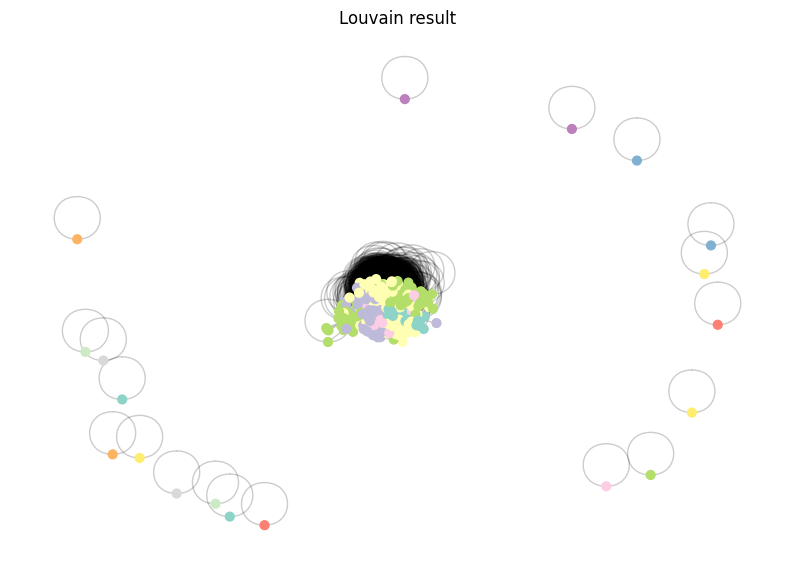

In [ ]:
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
colors = [partition[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=40, node_color=colors,
cmap=plt.cm.Set3)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title("Louvain result")
plt.axis('off')
plt.show()